Source: https://www.practicaldatascience.org/html/exercises/Exercise_reshaping.html

__(1) Download and import the data.__

NOTE: This data downloads as a zip file. Try loading it into pandas without unzipping it…

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('raw_WDI_Data_csv.zip')

In [6]:
df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
225491,Isle of Man,IMN,Adjusted savings: carbon dioxide damage (% of ...,NY.ADJ.DCO2.GN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198083,Greece,GRC,"Share of tariff lines with specific rates, all...",TM.TAX.MRCH.SR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.747745e-01,9.684782e-01,9.811296e-01,9.559591e-01,0.000000e+00,9.133151e-01,7.658858e-01,0.683381,NaN,NaN
323190,Philippines,PHL,"Children out of school, female (% of female pr...",SE.PRM.UNER.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.101490e+00,3.058560e+00,4.076270e+00,NaN,NaN,NaN
179604,Faroe Islands,FRO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.320425e+09,2.490808e+09,2.366301e+09,2.627050e+09,2.850744e+09,2.518096e+09,2.689157e+09,NaN,NaN,NaN
60617,Post-demographic dividend,PST,Tax revenue (current LCU),GC.TAX.TOTL.CN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__(2) In this exercise, we’d like to look at the relationship between GDP and inequality across countries. So before anything else, thin down your dataset by getting only the rows related to:__

GDP per capita (in Constant US Dollars – the “constant” means values are have been adjusted for inflation, so values from 1970 can be directly compared with 2010)

Gini coefficient

Information on income shares (what percentage of total income goes to X% of the income distribution).

In [8]:
for indicator in df['Indicator Name'].unique():
    print(indicator)

2005 PPP conversion factor, GDP (LCU per international $)
2005 PPP conversion factor, private consumption (LCU per international $)
Access to clean fuels and technologies for cooking (% of population)
Access to electricity (% of population)
Access to electricity, rural (% of rural population)
Access to electricity, urban (% of urban population)
Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)
Account ownership at a financial institution or with a mobile-money-service provider, older adults (% of population ages 25+)
Account ownership at a financial institution or with a mobile-money-service provider, poorest 40% (% of population ages 15+)
Account ownership at a financial institution or with

In [9]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [13]:
cond1 = df['Indicator Name'].isin(['GDP per capita (current US$)',
    'GINI index (World Bank estimate)',
    'Income share held by fourth 20%',
    'Income share held by highest 10%',
    'Income share held by highest 20%',
    'Income share held by lowest 10%',
    'Income share held by lowest 20%',
    'Income share held by second 20%',
    'Income share held by third 20%'])
filtered_df = df[cond1].copy()

In [14]:
filtered_df.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
21446,Heavily indebted poor countries (HIPC),HPC,Income share held by lowest 20%,SI.DST.FRST.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
354040,Slovenia,SVN,Income share held by third 20%,SI.DST.03RD.20,NaN,NaN,NaN,NaN,NaN,NaN,...,18.2,18.2,18.2,18.1,18.1,18.2,NaN,NaN,NaN,NaN
250100,Latvia,LVA,Income share held by highest 10%,SI.DST.10TH.10,NaN,NaN,NaN,NaN,NaN,NaN,...,26.2,27.3,26.5,26.8,26.6,26.1,NaN,NaN,NaN,NaN
109390,Bermuda,BMU,Income share held by lowest 10%,SI.DST.FRST.10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230796,Jamaica,JAM,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__(3) OK, that makes our data a lot more manageable, but it’s still pretty heinous.
In our analysis, we know that we’ll want to have country-years as our units of observation, so let’s start reshaping. Come up with a strategy that gets our inequality variables as columns, and makes each of our future observations (i.e. each country-year) a row.__

In [19]:
melted_df = filtered_df.melt(id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'])
melted_df = melted_df.rename({'variable':'year'},axis=1)
melted_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,year,value
0,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,1960,NaN
1,Arab World,ARB,GINI index (World Bank estimate),SI.POV.GINI,1960,NaN
2,Arab World,ARB,Income share held by fourth 20%,SI.DST.04TH.20,1960,NaN
3,Arab World,ARB,Income share held by highest 10%,SI.DST.10TH.10,1960,NaN
4,Arab World,ARB,Income share held by highest 20%,SI.DST.05TH.20,1960,NaN


In [21]:
del melted_df['Indicator Code']
del melted_df['Country Code']

In [34]:
pivoted_df = melted_df.pivot(index=['Country Name','year'], columns=['Indicator Name'], values=['value']).reset_index()
pivoted_df.columns = map((lambda x: x[0] if x[0] != 'value' else x[1]), pivoted_df.columns)
pivoted_df.head()

,Country Name,year,GDP per capita (current US$),GINI index (World Bank estimate),Income share held by fourth 20%,Income share held by highest 10%,Income share held by highest 20%,Income share held by lowest 10%,Income share held by lowest 20%,Income share held by second 20%,Income share held by third 20%
0,Afghanistan,1960,59.773194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961,59.860874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,58.458015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,78.706388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,82.095231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__(4) Now that you’ve done your reshapes, subset for observations since 1980.__

In [45]:
pivoted_df['year'] = pd.to_numeric(pivoted_df['year'], errors='coerce')

In [47]:
cond = pivoted_df['year'] >= 1980
subset_df = pivoted_df[cond].copy()

__(5) Subset for observations for which we have GINI index estimates.__

In [54]:
cond1 = subset_df['GINI index (World Bank estimate)'].notna()
cond2 = subset_df['GDP per capita (current US$)'].notna()
selected_df = subset_df[cond1&cond2].copy()

__(6) Plot the relationship between log GDP per capita and Gini scores for all country years and add a linear fit as well.__

In [66]:
selected_df['log GDP per capita (current US$)'] = np.log(selected_df['GDP per capita (current US$)'])

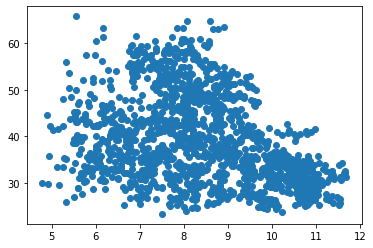

In [68]:
import matplotlib.pyplot as plt
plt.scatter(selected_df['log GDP per capita (current US$)'], selected_df['GINI index (World Bank estimate)'])

In [61]:
# %pip install seaborn

In [62]:
import seaborn as sns

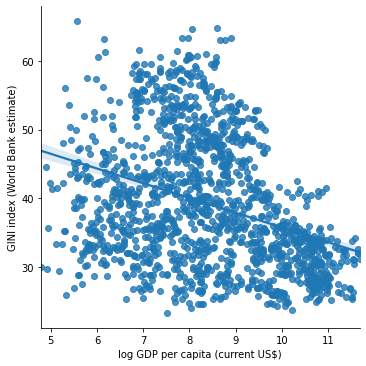

In [76]:
sns.lmplot(x='log GDP per capita (current US$)', y='GINI index (World Bank estimate)', data=selected_df)

__(7) It’s important to not always rely too much on a single measure of something like inequality. To check the robustness of our result, let’s be sure to also look at the relationship between inequality and income by using the income share of the richest 10% instead of just the GINI coefficient. Plot that relationship.__

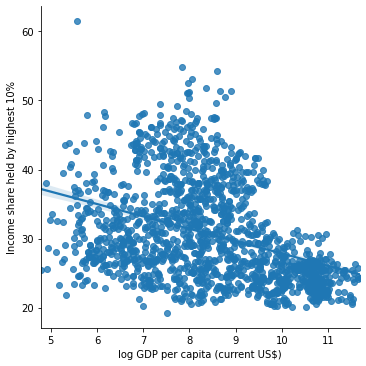

In [78]:
sns.lmplot(x='log GDP per capita (current US$)', y='Income share held by highest 10%', data=selected_df)